In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib as plt
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

%matplotlib inline

# Data inspection

In [2]:
def read_train():
    return pd.read_csv("x_train.csv"), pd.read_csv("y_train.csv")

In [3]:
def read_test():
    return pd.read_csv("x_test.csv")

In [4]:
def read_merged():
    train = pd.read_csv("x_train.csv")
    test = pd.read_csv("x_test.csv")
    return pd.concat([train, test], axis=0).reset_index()

In [5]:
x_merged = read_merged()

In [6]:
x_train, y_train = read_train()

In [7]:
x_test = read_test()

In [8]:
def get_interesting_feature_names(x):
    return x.columns[:73]

In [9]:
def get_categorical_features_mask(x):
#     print x.dtypes
    return  np.logical_and(
                x.dtypes != np.int64,
                x.dtypes != np.float64
            )

In [10]:
list(x_merged.columns)

['index',
 'm',
 'k',
 'n',
 'cacheL1IsShared',
 'cacheL1Size',
 'cacheL2IsShared',
 'cacheL2Size',
 'cacheL3IsShared',
 'cacheL3Size',
 'cacheL1Threads',
 'cacheL2Threads',
 'cacheL3Threads',
 'winPerfIndex',
 'memFreq',
 'memChanels',
 'memSize_MB',
 'memType',
 'memtRFC',
 'memtCL',
 'memtRCD',
 'memtRP',
 'memtRAS',
 'os',
 'cpuFull',
 'cpuArch',
 'cpuCores',
 'cpuFreq',
 'cpuBusFreq',
 'cpuTurbo',
 'cpuHT',
 'cpuCount',
 'cpuIsMobile',
 'IA.64_Technology',
 'AVX',
 'FPU128',
 'SSE5',
 'SSE4a',
 'SSE4.2',
 'SSE4.1',
 'S.SSE3',
 'SSE3',
 'SSE2',
 'SSE',
 'AES',
 'Extended_3DNow_Technology',
 'X3DNow_Technology',
 'X3DNOW_Prefetch',
 'X3DNow_Pro_Technology',
 'AMD_MMX_Technology',
 'MMX_Technology',
 'Cyrix_MMX_Technology',
 'FMA',
 'FMA4',
 'OSXSAVE',
 'XSAVE',
 'XOP',
 'F16C',
 'RDRAND',
 'FXSR.FXSAVE.FXRSTOR',
 'MOVBE',
 'PCLMULQDQ',
 'CLF_._Cache_Line_Flush',
 'CX8_._CMPXCHG8B',
 'CX16_._CMPXCHG16B',
 'CMOV_._Conditionnal_Move_Inst.',
 'MON_._Monitor.Mwait',
 'POPCNT',
 'RDTSCP',

In [11]:
get_interesting_feature_names(x_merged)

Index([u'index', u'm', u'k', u'n', u'cacheL1IsShared', u'cacheL1Size',
       u'cacheL2IsShared', u'cacheL2Size', u'cacheL3IsShared', u'cacheL3Size',
       u'cacheL1Threads', u'cacheL2Threads', u'cacheL3Threads',
       u'winPerfIndex', u'memFreq', u'memChanels', u'memSize_MB', u'memType',
       u'memtRFC', u'memtCL', u'memtRCD', u'memtRP', u'memtRAS', u'os',
       u'cpuFull', u'cpuArch', u'cpuCores', u'cpuFreq', u'cpuBusFreq',
       u'cpuTurbo', u'cpuHT', u'cpuCount', u'cpuIsMobile', u'IA.64_Technology',
       u'AVX', u'FPU128', u'SSE5', u'SSE4a', u'SSE4.2', u'SSE4.1', u'S.SSE3',
       u'SSE3', u'SSE2', u'SSE', u'AES', u'Extended_3DNow_Technology',
       u'X3DNow_Technology', u'X3DNOW_Prefetch', u'X3DNow_Pro_Technology',
       u'AMD_MMX_Technology', u'MMX_Technology', u'Cyrix_MMX_Technology',
       u'FMA', u'FMA4', u'OSXSAVE', u'XSAVE', u'XOP', u'F16C', u'RDRAND',
       u'FXSR.FXSAVE.FXRSTOR', u'MOVBE', u'PCLMULQDQ',
       u'CLF_._Cache_Line_Flush', u'CX8_._CMPXCHG8B', u'CX

In [12]:
def plot_mnk_stat(x):
    sb.distplot(x_train["m"])
    sb.distplot(x_train["k"])
    sb.distplot(x_train["n"])
    

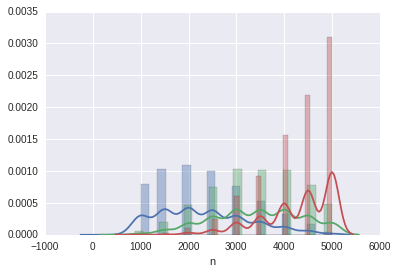

In [13]:
plot_mnk_stat(x_merged)

In [14]:
def get_stat(x):
    tmp = x[get_interesting_feature_names(x)]
    print tmp.min(axis=0) 
    print 
    print
    print tmp.max(axis=0)
    
    print tmp.max(axis=0) == tmp.min(axis=0)

In [15]:
def get_const_feature_list(x):
    return x.max(axis=0) == x.min(axis=0)

In [16]:
get_const_feature_list(x_merged).nonzero()

(array([ 8, 33, 37, 42, 43, 48, 50, 59, 62, 63, 65, 69, 70, 71]),)

In [17]:
def get_const_feature_names(x):
    return x.columns[x.max(axis=0) == x.min(axis=0)]

In [18]:
get_const_feature_names(x_merged)

Index([u'cacheL3IsShared', u'IA.64_Technology', u'SSE4a', u'SSE2', u'SSE',
       u'X3DNow_Pro_Technology', u'MMX_Technology', u'FXSR.FXSAVE.FXRSTOR',
       u'CLF_._Cache_Line_Flush', u'CX8_._CMPXCHG8B',
       u'CMOV_._Conditionnal_Move_Inst.', u'SEP_._Fast_System_Call', u'TBM',
       u'BMI'],
      dtype='object')

In [19]:
y_train.min(), y_train.max()

(time    1.000083
 dtype: float64, time    547.859176
 dtype: float64)

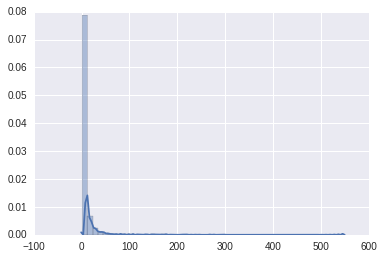

In [20]:
sb.distplot(y_train)

In [21]:
def plot_lapses(y, lapse):
    sb.distplot(y[y.values < lapse])

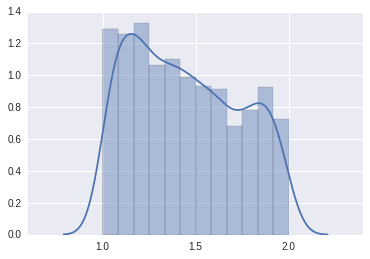

In [22]:
plot_lapses(y_train, 2)

In [215]:
def plot_ratio(x_train, y_train, color='b'):
    prod = x_train["m"]* x_train["n"]* x_train["k"]
    plt.scatter( prod, y_train, c=color)
    

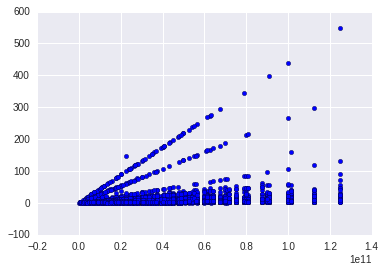

In [216]:
plot_ratio(x_train, y_train)

In [226]:
def plot_ratio_constrained(x_train, y_train, limit, color='b'):
    prod = x_train["m"]* x_train["n"]* x_train["k"]/1e6
    new_df = pd.concat([prod, y_train], axis=1)
    new_df = new_df[new_df[0] < limit]
#     new_df = new_df[new_df["prod"]]
#     
    plt.scatter(new_df[0], new_df["time"], c=color)

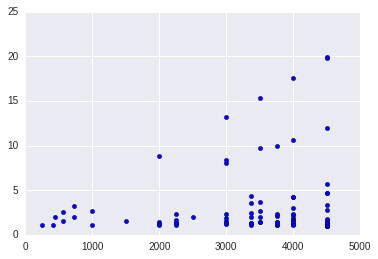

In [227]:
plot_ratio_constrained(x_train, y_train, limit=5000)

In [217]:
def plot_ratio_equals(x_train, y_train, limit, color='b'):
    prod = x_train["m"]* x_train["n"]* x_train["k"]/1e6
    new_df = pd.concat([prod, y_train, x_train], axis=1)
    new_df = new_df[new_df[0] == limit]
#     print new_df
    plt.scatter(new_df[0], new_df["time"], c=color)

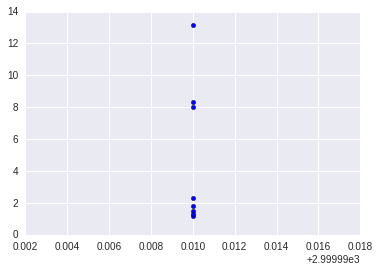

In [218]:
plot_ratio_equals(x_train, y_train, limit=3000)

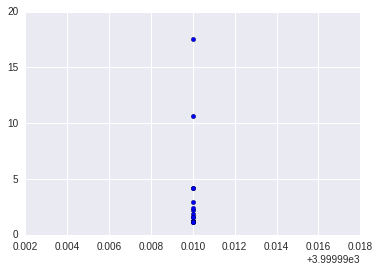

In [29]:
plot_ratio_equals(x_train, y_train, limit=4000)

# Data transformation & clusterization

In [30]:
from sklearn.cluster import MiniBatchKMeans, KMeans, Birch
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, maxabs_scale, StandardScaler, FunctionTransformer
from sklearn.feature_extraction import DictVectorizer

In [31]:
# def encode_onehot(df, cols):
#     """
#     One-hot encoding is applied to columns specified in a pandas DataFrame.
    
#     Modified from: https://gist.github.com/kljensen/5452382
    
#     Details:
    
#     http://en.wikipedia.org/wiki/One-hot
#     http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
    
#     @param df pandas DataFrame
#     @param cols a list of columns to encode
#     @return a DataFrame with one-hot encoding
#     """
#     vec = DictVectorizer()
    
#     vec_data = pd.DataFrame(vec.fit_transform(df.loc[:, cols].to_dict(outtype='records')).toarray())
#     vec_data.columns = vec.get_feature_names()
#     vec_data.index = df.index
    
#     df = df.drop(cols, axis=1)
#     df = df.join(vec_data)
#     return df

In [32]:
def add_features(x):
    x = x.copy()
    x = x["m"]* x["n"]* x["k"]/1e6

In [33]:
def encode_features(x, features_to_encode):
#     return encode_onehot(x, features_to_encode)
    x_old = x
    x = x.copy()
#     print x.loc[:, features_to_encode].shape, 
    encoder = LabelEncoder()
    x.loc[:, features_to_encode] = x.loc[:, features_to_encode].apply(encoder.fit_transform)
#     x = pd.DataFrame(x, columns=x_old.columns)
#     ohe = OneHotEncoder(sparse=False, categorical_features=features_to_encode)
#     x = ohe.fit_transform(x)
    return x, encoder

In [34]:
def use_encoder(x, encoder, features_to_encode):
    x_old = x
    x = x.copy() 
#     encoder = LabelEncoder()
    x.loc[:, features_to_encode] = x.loc[:, features_to_encode].apply(encoder.fit_transform)
    return x

In [35]:
def train_transformer(x_merged):
    
#     print x_merged.columns
    x_merged = x_merged.copy()
    
#     x_merged["mnk"] = x_merged["m"] * x_merged["n"] * x_merged["k"]
    
    scaler = StandardScaler()
    ohe = OneHotEncoder(categorical_features=get_categorical_features_mask(x_merged), sparse=False)
#     x_merged =  ohe.fit_transform(x_merged.copy().loc[:, get_interesting_feature_names(x_merged)].drop(["n", "m", "k"], axis=1))
    x_merged = ohe.fit_transform(x_merged.drop(["index", "m", "n", "k"], axis=1))
#     print x_merged.loc[:,get_categorical_features_mask(x_merged)].shape # = ohe.fit_transform(x_merged)
#     print x_merged.shape
#     print x_merged
    scaler.fit_transform(x_merged)
#     print x_merged.shape
        
    
    
    return FunctionTransformer(lambda x: scaler.transform(ohe.transform(x.copy())))
    

In [36]:
x_tmp, encoder = encode_features(x_train, get_categorical_features_mask(x_merged))

In [37]:
transformer = train_transformer(use_encoder(x_merged, encoder, get_categorical_features_mask(x_merged)))

/home/itasarom/.programs/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:1635: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 948 but corresponding boolean dimension is 952
  sel[np.asarray(selected)] = True


In [38]:
# transformer.transform(use_encoder(x_merged, encoder, get_categorical_features_mask(x_merged)))

In [39]:
def train_clusterer(x, Cl, n_clusters, features, transformer):
    x_old = x
    x = x.copy()
    clusterer = Cl(n_clusters=n_clusters)
#     x = x.loc[:, features].drop(["n", "m", "k"], axis=1)
#     x = maxabs_scale(x)
    print x.drop(["n", "m", "k"], axis=1).shape
    x = transformer.transform(x.drop(["n", "m", "k"], axis=1))#.loc[:, features]
    clusterer.fit(x)
    x_old["clust"] = clusterer.predict(x)
    return x_old, clusterer

In [40]:
def use_clusterer(x, clusterer, features, transformer):
    x_old = x
    x = x.copy()
#     x = x.loc[:, features].drop(["n", "m", "k"], axis=1)
#     x = maxabs_scale(x)
#     x = transformer.transform(x)
#     print x.shape
    x = transformer.transform(x.drop(["n", "m", "k"], axis=1))#.loc[:, features]
#     x = OneHotEncoder(categorical_features=get_categorical_features_mask(x_merged), sparse=False).fit_transform(x)
    x_old["clust"] = clusterer.predict(x)
    return x_old

In [41]:
x_tmp, clusterer = train_clusterer(x_tmp, Birch, 53, get_interesting_feature_names(x_tmp), transformer)

(4993, 948)


In [42]:
def plot_ratio_constrained_clustered(x_train, y_train, limit, n_clusters):
    
    def get_color(x):
        return ['b','r','green', 'grey', 'black', 'yellow', 'pink', 'brown'][x % 8]
    
    def get_cmap(N):
        '''Returns a function that maps each index in 0, 1, ... N-1 to a distinct 
        RGB color.'''
        color_norm  = colors.Normalize(vmin=0, vmax=N-1)
        scalar_map = cmx.ScalarMappable(norm=color_norm, cmap='hsv') 
        def map_index_to_rgb_color(index):
            return scalar_map.to_rgba(index)
        return map_index_to_rgb_color
    
    get_color = get_cmap(n_clusters)
    prod = x_train["m"]* x_train["n"]* x_train["k"]/1e6
    new_df = pd.concat([prod, y_train, x_train], axis=1)
    new_df = new_df[new_df[0] < limit]
    
#     for i in range(n_clusters):
#         print get_color(i)

#     print 
#     print new_df.loc[:, ["time", "clust"] + list(get_interesting_feature_names(x_train))]
    plt.scatter(new_df[0], new_df["time"], c = new_df["clust"].apply(get_color))

In [43]:
x_tmp.groupby(["clust"]).size()

clust
0     166
1     286
2     155
3      75
4     145
5      45
6     146
7     155
8      45
9      84
10     89
11    179
12     47
13     39
14    164
15    171
16    205
17    107
18    148
19     65
20     67
21    151
22     70
23     28
24     32
25     73
26     75
27     42
28    252
29     51
30     69
31     27
32    192
33     63
34     29
35     27
36     43
37    165
38     72
39     37
40     85
41     11
42     99
43     57
44     67
45    128
46     54
47     81
48     55
49     56
50     78
51     61
52     80
dtype: int64

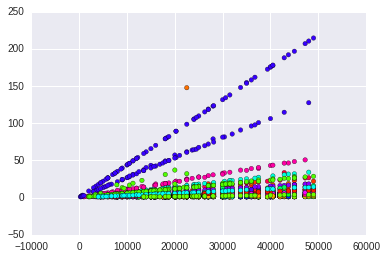

In [68]:
plot_ratio_constrained_clustered(x_tmp, y_train, 50000, 53)

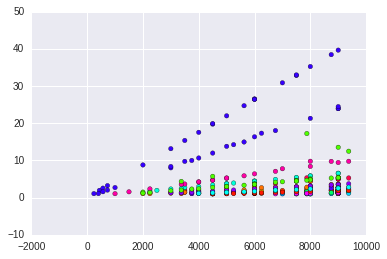

In [69]:
plot_ratio_constrained_clustered(x_tmp, y_train, 10000, 53)

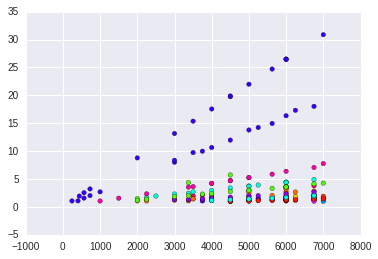

In [70]:
plot_ratio_constrained_clustered(x_tmp, y_train, 7500, 53)

In [71]:
def plot_ratio_equals_clustered(x_train, y_train, limit, n_clusters):
    
    def get_color(x):
        return ['b','r','green', 'grey', 'black', 'yellow', 'pink', 'brown'][x % 8]
    
    def get_cmap(N):
        '''Returns a function that maps each index in 0, 1, ... N-1 to a distinct 
        RGB color.'''
        color_norm  = colors.Normalize(vmin=0, vmax=N-1)
        scalar_map = cmx.ScalarMappable(norm=color_norm, cmap='hsv') 
        def map_index_to_rgb_color(index):
            return scalar_map.to_rgba(index)
        return map_index_to_rgb_color
    
    get_color = get_cmap(n_clusters)
    prod = x_train["m"]* x_train["n"]* x_train["k"]/1e6
    new_df = pd.concat([prod, y_train, x_train], axis=1)
    new_df = new_df[new_df[0] == limit]

#     print new_df.shape
    print new_df.loc[:, ["time", "clust"] + list(get_interesting_feature_names(x_train))]
    plt.scatter(new_df[0], new_df["time"], c = new_df["clust"].apply(get_color))

           time  clust     m     k     n  cacheL1IsShared  cacheL1Size  \
57     1.636818      1  1000  1500  5000                0           32   
60     1.624472      1  1000  2500  3000                0           32   
77     1.585416      1  1500  2000  2500                0           32   
200    1.209075     16  1000  1500  5000                0           32   
717    5.261882     50  1000  2500  3000                0           16   
966   32.845096     37  1000  2500  3000                1           24   
981   32.976764     37  1500  2000  2500                1           24   
1280   1.356440      4  1000  2500  3000                0           64   
1293   1.390967      4  1500  2000  2500                0           64   
1693   1.007187     16  1500  2000  2500                0           32   
1810   1.503334     51  1000  2500  3000                1           16   
1818   1.412808     51  1500  2000  2500                1           16   
2258   2.023025      7  1000  2500  30

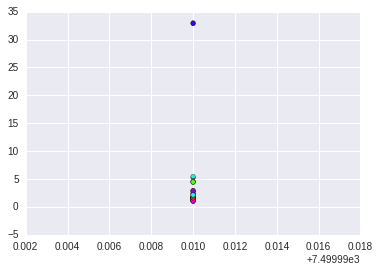

In [72]:
plot_ratio_equals_clustered(x_tmp, y_train, 7500, 53)

In [73]:
def plot_ratio_mnk_clustered(x_train, y_train, m, k, n, n_clusters):
    
    def get_color(x):
        return ['b','r','green', 'grey', 'black', 'yellow', 'pink', 'brown'][x % 8]
    
    def get_cmap(N):
        '''Returns a function that maps each index in 0, 1, ... N-1 to a distinct 
        RGB color.'''
        color_norm  = colors.Normalize(vmin=0, vmax=N-1)
        scalar_map = cmx.ScalarMappable(norm=color_norm, cmap='hsv') 
        def map_index_to_rgb_color(index):
            return scalar_map.to_rgba(index)
        return map_index_to_rgb_color
    
    get_color = get_cmap(n_clusters)
    prod = x_train["m"]* x_train["n"]* x_train["k"]/1e6
    new_df = pd.concat([prod, y_train, x_train], axis=1)
#     new_df = new_df[new_df[0] < limit]
    mask = new_df["m"] == m
    mask = np.logical_and(mask, new_df["n"] == n)
    mask = np.logical_and(mask, new_df["k"] == k)
#     print mask
    new_df = new_df[mask]

#     print 
    print new_df.loc[:, ["time", "clust"] + list(get_interesting_feature_names(x_train))]
    plt.scatter(new_df[0], new_df["time"], c = new_df["clust"].apply(get_color))

          time  clust     m     k     n  cacheL1IsShared  cacheL1Size  \
57    1.636818      1  1000  1500  5000                0           32   
200   1.209075     16  1000  1500  5000                0           32   
2505  1.731708     21  1000  1500  5000                0           32   
2627  1.633017      1  1000  1500  5000                0           32   
2759  1.712377     52  1000  1500  5000                0           32   
3038  2.493699      2  1000  1500  5000                0           64   
3188  1.026403     28  1000  1500  5000                0           32   
3443  2.874029      4  1000  1500  5000                0           64   
3779  2.892600     40  1000  1500  5000                1            8   
4506  1.085806     44  1000  1500  5000                0           16   
4685  4.417833     15  1000  1500  5000                1            8   

      cacheL2IsShared  cacheL2Size  cacheL3IsShared  ...    CX16_._CMPXCHG16B  \
57                  1         2048        

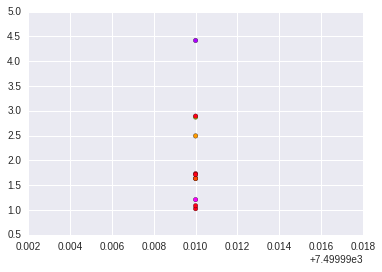

In [74]:
plot_ratio_mnk_clustered(x_tmp, y_train, 1000, 1500, 5000, 20)

           time  clust     m     k     n  cacheL1IsShared  cacheL1Size  \
60     1.624472      1  1000  2500  3000                0           32   
717    5.261882     50  1000  2500  3000                0           16   
966   32.845096     37  1000  2500  3000                1           24   
1280   1.356440      4  1000  2500  3000                0           64   
1810   1.503334     51  1000  2500  3000                1           16   
2258   2.023025      7  1000  2500  3000                0           32   
2842   2.223479      7  1000  2500  3000                0           32   
2966   1.774903      2  1000  2500  3000                0           64   
3042   2.349506      2  1000  2500  3000                0           64   
3554   1.109721     30  1000  2500  3000                0           32   
4001   4.587650     15  1000  2500  3000                1            8   
4410   1.341634     21  1000  2500  3000                0           32   
4690   4.490613     15  1000  2500  30

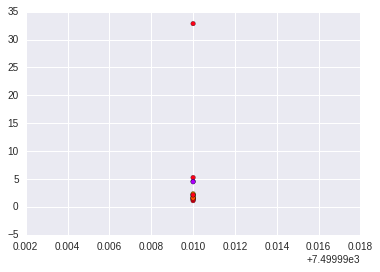

In [75]:
plot_ratio_mnk_clustered(x_tmp, y_train, 1000,  2500,  3000, 20)

           time  clust     m     k     n  cacheL1IsShared  cacheL1Size  \
61     2.184079      1  1000  2500  4000                0           32   
91     2.107623      1  2000  2000  2500                0           32   
203    1.304339     16  1000  2000  5000                0           32   
374    1.051775     45  2000  2000  2500                0           32   
589    1.452466     28  1000  2000  5000                0           32   
591    1.341139     28  1000  2500  4000                0           32   
718    5.642251     50  1000  2500  4000                0           16   
744    6.282407     50  2000  2000  2500                0           16   
874    1.225547     32  1000  2000  5000                0           32   
875    1.215246     32  1000  2500  4000                0           32   
900    1.200075     32  2000  2000  2500                0           32   
965   43.868561     37  1000  2000  5000                1           24   
1278   1.790105      4  1000  2000  50

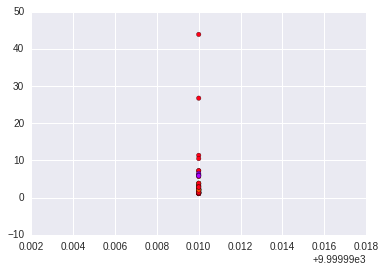

In [76]:
plot_ratio_equals_clustered(x_tmp, y_train, 10000, 20)

           time  clust     m     k     n  cacheL1IsShared  cacheL1Size  \
203    1.304339     16  1000  2000  5000                0           32   
589    1.452466     28  1000  2000  5000                0           32   
874    1.225547     32  1000  2000  5000                0           32   
965   43.868561     37  1000  2000  5000                1           24   
1278   1.790105      4  1000  2000  5000                0           64   
1616   1.738683     16  1000  2000  5000                0           32   
1808   1.968811     51  1000  2000  5000                1           16   
2257   2.225563      7  1000  2000  5000                0           32   
2509   2.379469     21  1000  2000  5000                0           32   
2763   2.223037     52  1000  2000  5000                0           32   
2965   2.365873      2  1000  2000  5000                0           64   
3041   2.844820      2  1000  2000  5000                0           64   
3127   7.226164     25  1000  2000  50

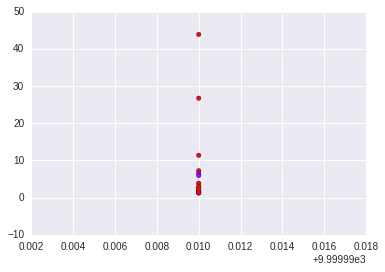

In [77]:
plot_ratio_mnk_clustered(x_tmp, y_train, 1000,  2000,  5000, 20)

In [78]:
x_tmp.loc[[4000, 4689]]

m     k     n  cacheL1IsShared  cacheL1Size  cacheL2IsShared  \
4000  1000  2000  5000                1            8                1   
4689  1000  2000  5000                1            8                1   

      cacheL2Size  cacheL3IsShared  cacheL3Size  cacheL1Threads  ...    \
4000          512                1            0               1  ...     
4689          512                1            0               1  ...     

      SeqCopy_16MB_by256  SeqCopy_20MB_by256  SeqCopy_21MB_by256  \
4000                 0.0                 0.0                 0.0   
4689                 0.0                 0.0                 0.0   

      SeqCopy_32MB_by256  SeqCopy_48MB_by256  SeqCopy_64MB_by256  \
4000                 0.0                 0.0                 0.0   
4689                 0.0                 0.0                 0.0   

      SeqCopy_72MB_by256  SeqCopy_96MB_by256  SeqCopy_128MB_by256  clust  
4000                 0.0                 0.0                  0.0     15  
4689                 0.0                 0.0                  0.0     15  

[2 rows x 952 columns]

In [79]:
# x_tmp.loc[4000] == x_tmp.loc[4689]

In [80]:
# x_tmp.groupby(["cpuFreq"]).size()

In [81]:
x_tmp.loc[[4000, 4689], np.logical_not(x_tmp.loc[4000] == x_tmp.loc[4689])]

memFreq  memSize_MB  memType  memtCL  memtRCD  memtRP  memtRAS  os  \
4000       44        2304        0     2.0        2       2        5   2   
4689        0        1024        1     2.5        3       3        6   3   

      cpuFull  cpuArch         ...          SeqCopy15MB_by128  \
4000       68       19         ...                      428.6   
4689       72       13         ...                      400.0   

      SeqCopy16MB_by128  SeqCopy20MB_by128  SeqCopy21MB_by128  \
4000              512.0              550.5              572.7   
4689              400.0              400.0              370.6   

      SeqCopy32MB_by128  SeqCopy48MB_by128  SeqCopy64MB_by128  \
4000              512.0              440.4              410.3   
4689              355.6              369.2              376.5   

      SeqCopy72MB_by128  SeqCopy96MB_by128  SeqCopy128MB_by128  
4000              461.5              558.1               481.2  
4689              378.9              369.2               386.7  

[2 rows x 478 columns]

### So let us try an another strategy of clustering, considering features of CPU

In [82]:
# clusterer_all = train_clusterer(x_tmp, Birch, 53, x_tmp.columns, transformer)

In [83]:
x_tmp.groupby(["clust"]).size()

clust
0     166
1     286
2     155
3      75
4     145
5      45
6     146
7     155
8      45
9      84
10     89
11    179
12     47
13     39
14    164
15    171
16    205
17    107
18    148
19     65
20     67
21    151
22     70
23     28
24     32
25     73
26     75
27     42
28    252
29     51
30     69
31     27
32    192
33     63
34     29
35     27
36     43
37    165
38     72
39     37
40     85
41     11
42     99
43     57
44     67
45    128
46     54
47     81
48     55
49     56
50     78
51     61
52     80
dtype: int64

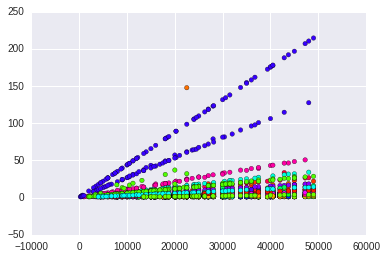

In [84]:
plot_ratio_constrained_clustered(x_tmp, y_train, 50000, 53)

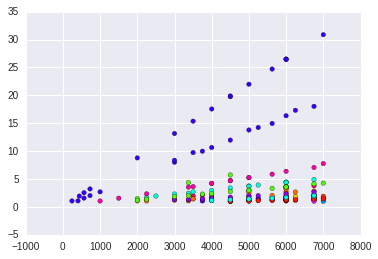

In [85]:
plot_ratio_constrained_clustered(x_tmp, y_train, 7500, 53)

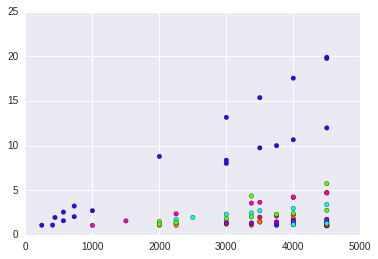

In [86]:
plot_ratio_constrained_clustered(x_tmp, y_train, 5000, 53)

It was a stupid idea, reverting back.

In [87]:
x_two_beams = x_tmp[x_tmp["clust"] == 10]

In [88]:
# x_two_beams

In [89]:
# x_two_beams.drop(["m", "n", "k"], axis=1).drop_duplicates()

In [90]:
def print_real_clusters(x, n_clusters):
    for i in range(n_clusters):
        cur = x[x["clust"] == i]
        print len(cur), " --> ", len(cur.drop(["m", "n", "k"], axis=1).drop_duplicates())
#         print cur.drop(["m", "n", "k"], axis=1).drop_duplicates()
#         print "===="
        

In [91]:
print_real_clusters(x_tmp, 53)

166  -->  3
286  -->  4
155  -->  2
75  -->  2
145  -->  2
45  -->  2
146  -->  3
155  -->  2
45  -->  2
84  -->  2
89  -->  2
179  -->  4
47  -->  1
39  -->  2
164  -->  3
171  -->  2
205  -->  3
107  -->  2
148  -->  3
65  -->  1
67  -->  2
151  -->  2
70  -->  2
28  -->  1
32  -->  1
73  -->  1
75  -->  1
42  -->  1
252  -->  4
51  -->  1
69  -->  1
27  -->  1
192  -->  3
63  -->  2
29  -->  1
27  -->  1
43  -->  1
165  -->  2
72  -->  1
37  -->  1
85  -->  1
11  -->  1
99  -->  2
57  -->  1
67  -->  1
128  -->  2
54  -->  1
81  -->  1
55  -->  1
56  -->  1
78  -->  1
61  -->  1
80  -->  1


# Now it's time to fit my first model

We've chosen to cluster things to 53 clusters and fit a linear regression for each.

In [174]:
from sklearn.linear_model import  LinearRegression
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score

In [94]:
def prepend(to, what):
    what = what.reshape((what.shape[0], 1))
    return np.append(what, to, axis=1)

def make_set(x, clusterer, encoder, transformer):
    x = x.copy()
    x = use_encoder(x, encoder, get_categorical_features_mask(x))
    x_transformed = transformer.transform(x.drop(["k", "m", "n"], axis=1))
    x_clust = use_clusterer(x, clusterer, get_interesting_feature_names(x), transformer)["clust"]
    x_kmn = x["m"]* x["n"]* x["k"]/1e6
    
#     x.
#     print x_clust.shape, x_kmn.shape

    x_transformed = prepend(x_transformed, x_kmn)
    x_transformed = prepend(x_transformed, x_clust)
    
#     x_kmn = x_kmn.reshape((x_kmn.shape[0]))
#     print x_clust.shape
#     x_transformed = np.append(x_clust, x_transformed, axis=1
    return x_transformed

In [95]:
x_prep_train = make_set(x_train, clusterer, encoder, transformer)

In [96]:
# x_prep[:, [0, 1]]

In [97]:
x_prep_test = make_set(x_test, clusterer, encoder, transformer)

In [179]:
class MyClassifier:
    def __init__(self, n_clusters, base_estimator, n_to_drop):
        self.n_clusters = n_clusters
        self.base_estimator = base_estimator
        self.n_to_drop = n_to_drop
        
    def fit(self, x, y):
        self.estimators = []
        for i in range(self.n_clusters):
#             print "Lololo"
            cur_est = sklearn.base.clone(self.base_estimator)
# #             print x[0] == i
            cur_idx = x[:, 0] == i
            cur_x = x[cur_idx]
            cur_x = cur_x[:, 1:2]
#             print cur_x.shape
            cur_y = y[cur_idx]
#             print cur_y.shape
            cur_est.fit(cur_x, cur_y)
            self.estimators.append(cur_est)
#             break
        
        return self
    
    def predict(self, x):
        prediction = []
        
        for row in x:
#             print int(row[0])
            cur_est = self.estimators[int(row[0])]
#             cur_x = x.drop(range(n_to_drop), axis=1)
            cur_x = row[1:2]
            prediction.append(cur_est.predict(cur_x))
            
        return np.concatenate(prediction)
    
    def clone(self):
        return MyClassifier(self.n_clusters, self.base_estimator, self.n_to_drop)
            
            

In [190]:
cls = MyClassifier(53,  LinearRegression(), 74)

In [191]:
cls.fit(x_prep_train, y_train.values)

<__main__.MyClassifier instance at 0x7fce91e99758>

In [147]:
pred = cls.predict(x_prep_train)

/home/itasarom/.programs/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/itasarom/.programs/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/itasarom/.programs/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape

In [170]:
def mape(y_pred, y_true):
    return np.mean(np.abs(y_pred - y_true)/y_true)

In [230]:
def prediction_plot(x_tmp, y_pred, y_true, lim, n_clusters):
    plot_ratio_constrained_clustered(x_tmp, pd.DataFrame(y_pred, columns=["time"]), lim, n_clusters)
    plot_ratio_constrained_clustered(x_tmp, y_true, lim, n_clusters)
    plt.show()
    
    plot_ratio_constrained_clustered(x_tmp, pd.DataFrame(y_pred, columns=["time"]), lim, n_clusters)
    plt.show()
    plot_ratio_constrained_clustered(x_tmp, y_true, lim, n_clusters)
    plt.show()
    
    plot_ratio_constrained(x_tmp, pd.DataFrame(y_pred, columns=["time"]),lim, color='b')
    plot_ratio_constrained(x_tmp, y_train, lim, color='r')
    
    plt.show()
    

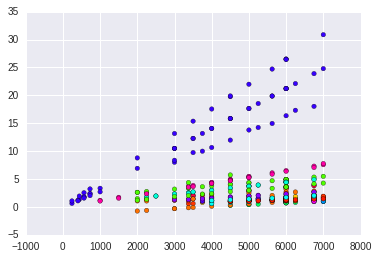

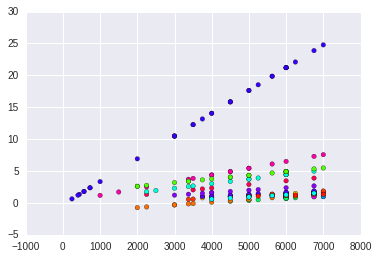

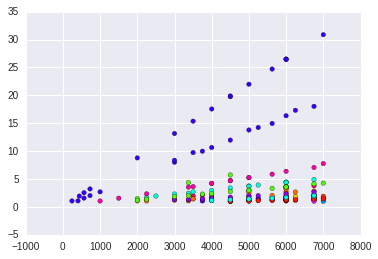

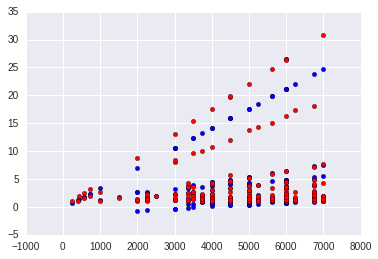

In [235]:
prediction_plot(x_tmp, pred, y_train, 7500, 53)

In [234]:
# prediction_plot(x_tmp, pred, y_train, 7500, 53)

In [176]:
# cross_val_score(MyClassifier(53,  LinearRegression(), 0), x_prep_train, y_train.values, lambda est, x, y: mape(est.predict(x), y))

In [187]:
def cross_validation(base_estimator, x, y, n_folds=3):
    scores = []
    for train_idx, test_idx in KFold(len(x), n_folds=n_folds, shuffle=True):
        cur_est = base_estimator.clone()
        cur_est.fit(x[train_idx], y[train_idx])
        y_pred = cur_est.predict(x[test_idx])
        scores.append(mape(y_pred, y[test_idx]))
    
    return scores

In [189]:
cross_validation(MyClassifier(53,  LinearRegression(), 74), x_prep_train, y_train.values, n_folds=5)

/home/itasarom/.programs/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/itasarom/.programs/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/itasarom/.programs/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape

[0.20045202830371192,
 0.19182952408634765,
 0.20724617622365252,
 0.20571230363435986,
 0.19279581719142075]

In [194]:
result = cls.predict(x_prep_test)

/home/itasarom/.programs/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/itasarom/.programs/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/itasarom/.programs/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape

In [201]:
# result[result <= 0.0]

In [198]:
np.savetxt("result.txt", result)

In [199]:
# result[result > 100.0]

array([ 106.96838771,  108.30841488,  120.36865943,  133.76893114,
        106.96838771,  112.3284964 ,  114.11519929,  160.56947458,
        111.43514495,  133.76893114,  160.56947458,  180.66988215,
        128.40882246,  149.8492572 ,  214.17056144,  216.85061578,
        267.7716483 ,  199.87693828,  249.90461935,  253.03134942,
        312.43922069,  228.4641846 ,  257.05143093,  285.63867726,
        289.21208305,  321.37273517,  361.57355032,  401.77436546,
        107.87393205,  106.96838771,  133.76893114,  112.3284964 ,
        124.83541667,  144.48914852,  160.56947458,  111.43514495,
        106.96838771,  120.36865943,  109.20176633,  124.83541667,
        140.469067  ,  156.10271734,  142.70244562,  160.56947458,
        180.66988215,  112.3284964 ,  128.40882246,  144.48914852,
        160.56947458,  149.8492572 ,  168.60963761,  192.73012669,
        214.17056144,  267.7716483 ,  174.86309774,  224.89077881,
        253.03134942,  281.17192002,  312.43922069,  257.05143

In [200]:
# len(result)

4947